In [ ]:
!pip install pycaret==2.3.8

     |████████████████████████████████| 318 kB 5.1 MB/s 
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
     |████████████████████████████████| 125 kB 26.5 MB/s 
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
  Attempting uninstall: pycaret
    Found existing installation: pycaret 2.3.7
    Uninstalling pycaret-2.3.7:
      Successfully uninstalled pycaret-2.3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.

In [ ]:
# !pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/members_v01_sample_joinfinal.csv")
dataset.shape

(3102, 20)

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2947, 20)
Unseen Data For Predictions: (155, 20)


In [ ]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'is_churn',  fold_shuffle=True, session_id=2) 

,Description,Value
0,session_id,2
1,Target,is_churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2947, 20)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9598,0.8373,0.5559,0.9120,0.6788,0.6595,0.6881,0.324
dt,Decision Tree Classifier,0.9588,0.7802,0.5673,0.8700,0.6772,0.6572,0.6787,0.432
gbc,Gradient Boosting Classifier,0.9578,0.8682,0.5309,0.9122,0.6603,0.6403,0.6716,4.417
ada,Ada Boost Classifier,0.9568,0.8344,0.5379,0.8688,0.6559,0.6352,0.6601,1.256
rf,Random Forest Classifier,0.9535,0.8379,0.4353,0.9764,0.5851,0.5660,0.6246,1.400
et,Extra Trees Classifier,0.9525,0.8450,0.4169,0.9889,0.5702,0.5511,0.6155,2.037
nb,Naive Bayes,0.9520,0.8304,0.4776,0.8639,0.6054,0.5831,0.6166,0.112
lr,Logistic Regression,0.9510,0.8035,0.4169,0.9332,0.5637,0.5434,0.5978,7.089
ridge,Ridge Classifier,0.9438,0.0000,0.3143,0.9657,0.4608,0.4409,0.5223,1.568
knn,K Neighbors Classifier,0.9302,0.6636,0.1629,0.8121,0.2633,0.2459,0.3375,0.576


In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.9565  0.7621  0.5294  0.9000  0.6667  0.6451  0.6712
       1       0.9420  0.7006  0.4118  0.7778  0.5385  0.5106  0.5402
       2       0.9369  0.6224  0.2500  0.8000  0.3810  0.3572  0.4257
       3       0.9854  0.9062  0.8125  1.0000  0.8966  0.8888  0.8944
       4       0.9757  0.8724  0.7500  0.9231  0.8276  0.8147  0.8198
       5       0.9612  0.8072  0.6250  0.8333  0.7143  0.6939  0.7022
       6       0.9563  0.7621  0.5294  0.9000  0.6667  0.6450  0.6711
       7       0.9660  0.8477  0.7059  0.8571  0.7742  0.7560  0.7602
       8       0.9466  0.7300  0.4706  0.8000  0.5926  0.5661  0.5890
       9       0.9612  0.7915  0.5882  0.9091  0.7143  0.6945  0.7135
       Mean    0.9588  0.7802  0.5673  0.8700  0.6772  0.6572  0.6787
       Std     0.0141  0.0801  0.1592  0.0655  0.1405  0.1453  0.1289
Train  NaN     1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

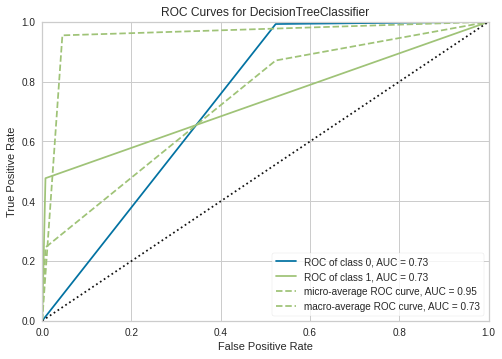

In [ ]:
plot_model(dt, plot = 'auc')

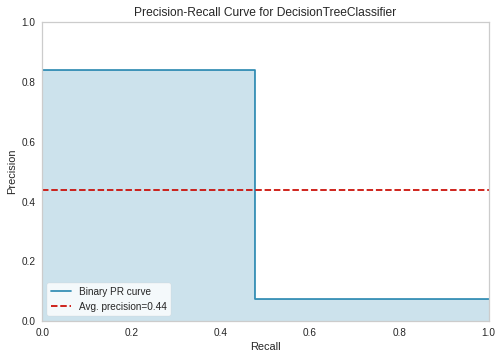

In [ ]:
plot_model(dt, plot = 'pr')

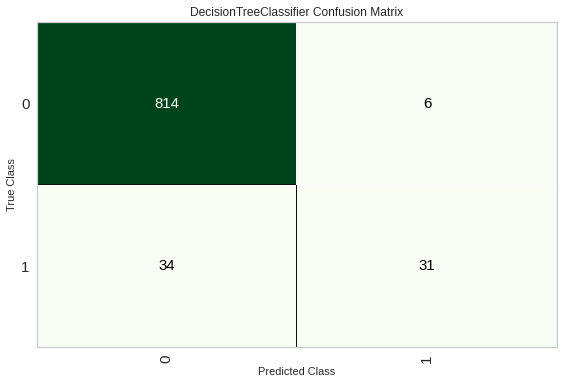

In [ ]:
plot_model(dt, plot = 'confusion_matrix')

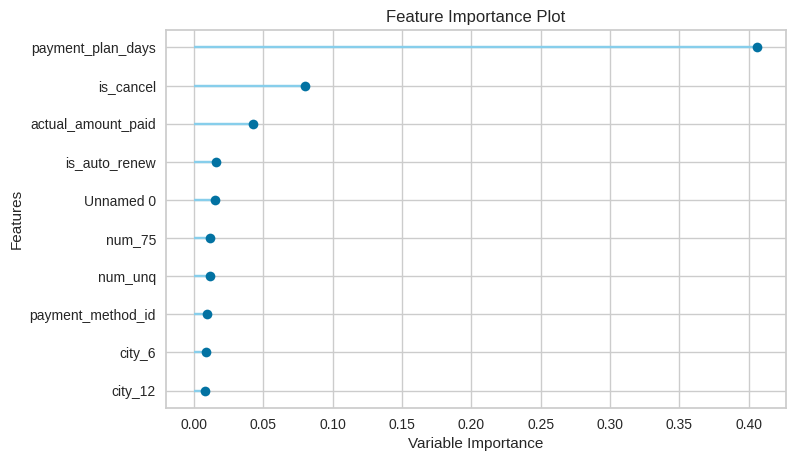

In [ ]:
plot_model(dt, plot='feature')

In [ ]:
predict_model(dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9548,0.7348,0.4769,0.8378,0.6078,0.5858,0.6121
